In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import LogFormatterSciNotation

## Fig. S1A Power law of viscosity with temperature (>5000 1/s)

In [2]:
path3 = r'..\data\20211210_temperature_study_all_buffers.xlsx'

df_05 = pd.read_excel(path3, sheet_name='0.49% MC-PBS', header=0)
df_06 =  pd.read_excel(path3, sheet_name='0.59% MC-PBS', header=0)
df_084 = pd.read_excel(path3, sheet_name='0.83% MC-PBS', header=0)
df_06

Point No        Sample  Shear rate  Shear stress  Viscosity  \
0           1  0.59% MC-PBS         600        17.197    28.6660   
1           2  0.59% MC-PBS         842        22.292    26.4740   
2           3  0.59% MC-PBS        1180        28.627    24.2220   
3           4  0.59% MC-PBS        1660        36.459    21.9780   
4           5  0.59% MC-PBS        2330        45.930    19.7260   
..        ...           ...         ...           ...        ...   
271         8  0.59% MC-PBS        6440        67.454    10.4760   
272         9  0.59% MC-PBS        9040        84.494     9.3486   
273        10  0.59% MC-PBS       12700       104.930     8.2705   
274        11  0.59% MC-PBS       17800       130.230     7.3129   
275        12  0.59% MC-PBS       25000       161.520     6.4614   

     Temperature [°C]  Repeat  Normal Force  Rotational Speed     R   rho  \
0                  22       1          0.01          0.511860  0.02  1005   
1                  22       1          0.02          0.718460  0.02  1005   
2                  22       1          0.02          1.008400  0.02  1005   
3                  22       1          0.03          1.415400  0.02  1005   
4                  22       1          0.05          1.986800  0.02  1005   
..                ...     ...           ...               ...   ...   ...   
271                37       5          0.08          5.494167  0.02  1005   
272                37       5          0.10          7.711833  0.02  1005   
273                37       5          0.11         10.825333  0.02  1005   
274                37       5          0.13         15.195500  0.02  1005   
275                37       5          0.13         21.330000  0.02  1005   

             N1  concentration  
0     16.071421            0.6  
1     32.138189            0.6  
2     32.436166            0.6  
3     48.938755            0.6  
4     81.926701            0.6  
..          ...            ...  
271  145.288685            0.6  
272  194.549162            0.6  
273  244.813275            0.6  
274  344.320509            0.6  
275  477.670318            0.6  

[276 rows x 13 columns]

In [3]:
concatenated = pd.concat([df_05.assign(Samples= '0.49% MC-PBS'), df_06.assign(Samples='0.59% MC-PBS'),
                          df_084.assign(Samples='0.83% MC-PBS')])

df_05_filt = df_05[df_05['Shear rate']>5000] # filter power law regime
df_06_filt = df_06[df_06['Shear rate']>5000] # filter power law regime
df_084_filt = df_084[df_084['Shear rate']>5000] # filter power law regime

concatenated_filt = pd.concat([df_05_filt.assign(Samples= '0.49% MC-PBS'),
                               df_06_filt.assign(Samples='0.59% MC-PBS'),
                               df_084_filt.assign(Samples='0.83% MC-PBS')]
                              )
df_means = concatenated.groupby(by=['Sample', 'Shear rate', 'Temperature [°C]'], as_index=False).mean(numeric_only=True)
df_sd = concatenated.groupby(by=['Sample', 'Shear rate', 'Temperature [°C]'], as_index=False).std()
df_means

Sample  Shear rate  Temperature [°C]  Point No  Shear stress  \
0    0.49% MC-PBS         600                22       1.0     11.763333   
1    0.49% MC-PBS         600                25       1.0     10.392333   
2    0.49% MC-PBS         600                28       1.0      9.487233   
3    0.49% MC-PBS         600                31       1.0      9.126850   
4    0.49% MC-PBS         600                34       1.0      8.890000   
..            ...         ...               ...       ...           ...   
211  0.83% MC-PBS       25000                25      12.0    264.503333   
212  0.83% MC-PBS       25000                28      12.0    253.193333   
213  0.83% MC-PBS       25000                31      12.0    241.036667   
214  0.83% MC-PBS       25000                34      12.0    233.413333   
215  0.83% MC-PBS       25000                37      12.0    234.056667   

     Viscosity  Repeat  Normal Force  Rotational Speed     R     rho  \
0    19.609000     2.0      0.006667           0.51186  0.02  1005.0   
1    17.324000     2.0      0.006667           0.51186  0.02  1005.0   
2    15.815000     2.0      0.000000           0.51186  0.02  1005.0   
3    15.211000     1.5      0.000000           0.51186  0.02  1005.0   
4    14.819333     2.0      0.000000           0.51186  0.02  1005.0   
..         ...     ...           ...               ...   ...     ...   
211  10.581333     2.0      0.346667          21.33000  0.02  1005.0   
212  10.128500     2.0      0.330000          21.33000  0.02  1005.0   
213   9.642100     2.0      0.313333          21.33000  0.02  1005.0   
214   9.337200     2.0      0.266667          21.33000  0.02  1005.0   
215   9.363200     2.0      0.286667          21.33000  0.02  1005.0   

             N1  concentration  
0     10.766256           0.50  
1     10.766256           0.50  
2      0.155926           0.50  
3      0.155926           0.50  
4      0.155926           0.50  
..          ...            ...  
211  822.506028           0.84  
212  795.980205           0.84  
213  769.454381           0.84  
214  695.182074           0.84  
215  727.013063           0.84  

[216 rows x 13 columns]

In [4]:
df_05_mean = df_05_filt.groupby(by=['Shear rate', 'Temperature [°C]'], as_index=False).mean(numeric_only=True)
df_06_mean = df_06_filt.groupby(by=['Shear rate', 'Temperature [°C]'], as_index=False).mean(numeric_only=True)
df_084_mean = df_084_filt.groupby(by=['Shear rate', 'Temperature [°C]'], as_index=False).mean(numeric_only=True)

df_05_mean_all = df_05.groupby(by=['Shear rate', 'Temperature [°C]'], as_index=False).mean(numeric_only=True)
df_06_mean_all = df_06.groupby(by=['Shear rate', 'Temperature [°C]'], as_index=False).mean(numeric_only=True)
df_084_mean_all = df_084.groupby(by=['Shear rate', 'Temperature [°C]'], as_index=False).mean(numeric_only=True)

df_06_mean

Shear rate  Temperature [°C]  Point No  Shear stress  Viscosity  Repeat  \
0         6440                22       8.0     86.677667  13.461333     2.0   
1         6440                25       8.0     84.507667  13.124333     2.0   
2         6440                28       8.0     78.878333  12.250000     2.0   
3         6440                31       8.0     77.913667  12.100333     2.0   
4         6440                34       8.0     75.301667  11.694667     3.5   
5         6440                37       8.0     71.748200  11.142800     3.0   
6         9040                22       9.0    106.096667  11.738333     2.0   
7         9040                25       9.0    103.633333  11.466333     2.0   
8         9040                28       9.0     97.340333  10.770000     2.0   
9         9040                31       9.0     96.177000  10.641333     2.0   
10        9040                34       9.0     93.271500  10.319683     3.5   
11        9040                37       9.0     88.696800   9.813520     3.0   
12       12700                22      10.0    129.450000  10.203167     2.0   
13       12700                25      10.0    126.746667   9.990000     2.0   
14       12700                28      10.0    119.520000   9.420500     2.0   
15       12700                31      10.0    118.236667   9.319500     2.0   
16       12700                34      10.0    114.625000   9.034900     3.5   
17       12700                37      10.0    109.626000   8.641080     3.0   
18       17800                22      11.0    157.720000   8.856167     2.0   
19       17800                25      11.0    154.653333   8.683867     2.0   
20       17800                28      11.0    146.406667   8.220967     2.0   
21       17800                31      11.0    145.126667   8.149300     2.0   
22       17800                34      11.0    140.933333   7.913633     3.5   
23       17800                37      11.0    134.932000   7.576700     3.0   
24       25000                22      12.0    189.870000   7.595267     2.0   
25       25000                25      12.0    188.420000   7.537500     2.0   
26       25000                28      12.0    178.363333   7.135133     2.0   
27       25000                31      12.0    177.746667   7.110400     2.0   
28       25000                34      12.0    172.670000   6.907317     3.5   
29       25000                37      12.0    165.642000   6.626220     3.0   

    Normal Force  Rotational Speed     R     rho          N1  concentration  
0       0.110000          5.494100  0.02  1005.0  193.034732            0.6  
1       0.103333          5.494167  0.02  1005.0  182.424839            0.6  
2       0.093333          5.494167  0.02  1005.0  166.509344            0.6  
3       0.090000          5.494167  0.02  1005.0  161.204180            0.6  
4       0.093333          5.494167  0.02  1005.0  166.509344            0.6  
5       0.080000          5.494167  0.02  1005.0  145.288685            0.6  
6       0.143333          7.711800  0.02  1005.0  263.515998            0.6  
7       0.133333          7.711833  0.02  1005.0  247.600809            0.6  
8       0.120000          7.711833  0.02  1005.0  226.380150            0.6  
9       0.120000          7.711833  0.02  1005.0  226.380150            0.6  
10      0.113333          7.711833  0.02  1005.0  215.769821            0.6  
11      0.100000          7.711833  0.02  1005.0  194.549162            0.6  
12      0.173333         10.825000  0.02  1005.0  345.607111            0.6  
13      0.160000         10.825333  0.02  1005.0  324.390747            0.6  
14      0.143333         10.825333  0.02  1005.0  297.864923            0.6  
15      0.143333         10.825333  0.02  1005.0  297.864923            0.6  
16      0.133333         10.825333  0.02  1005.0  281.949428            0.6  
17      0.116000         10.825333  0.02  1005.0  254.362572            0.6  
18      0.196667         15.195667  0.02  1005.0  450.426819            

In [5]:
std_05 = df_05.groupby(by=['Shear rate', 'Temperature [°C]'], as_index=False).std()
std_06 = df_06.groupby(by=['Shear rate', 'Temperature [°C]'], as_index=False).std()
std_084 = df_084.groupby(by=['Shear rate', 'Temperature [°C]'], as_index=False).std()

std_viscosity_05 = np.array(std_05['Viscosity'], dtype=float)
std_viscosity_06 = np.array(std_06['Viscosity'], dtype=float)
std_viscosity_084 = np.array(std_084['Viscosity'], dtype=float)

std_06

Shear rate  Temperature [°C]  Point No  Shear stress  Viscosity    Repeat  \
0          600                22       0.0      0.418580   0.697732  1.000000   
1          600                25       0.0      0.542310   0.903466  1.000000   
2          600                28       0.0      0.588215   0.980745  1.000000   
3          600                31       0.0      1.312422   2.187464  1.000000   
4          600                34       0.0      1.341956   2.237242  1.870829   
..         ...               ...       ...           ...        ...       ...   
67       25000                25       0.0      3.445054   0.137685  1.000000   
68       25000                28       0.0      4.420796   0.176753  1.000000   
69       25000                31       0.0      9.607311   0.384253  1.000000   
70       25000                34       0.0      7.889213   0.315475  1.870829   
71       25000                37       0.0      2.617541   0.104656  1.581139   

    Normal Force  Rotational Speed    R  rho         N1  concentration  
0       0.005774               0.0  0.0  0.0   9.188815            0.0  
1       0.005774               0.0  0.0  0.0   9.188815            0.0  
2       0.005774               0.0  0.0  0.0   9.188815            0.0  
3       0.005774               0.0  0.0  0.0   9.188815            0.0  
4       0.005164               0.0  0.0  0.0   8.218726            0.0  
..           ...               ...  ...  ...        ...            ...  
67      0.005774               0.0  0.0  0.0   9.188815            0.0  
68      0.057735               0.0  0.0  0.0  91.888149            0.0  
69      0.015275               0.0  0.0  0.0  24.311319            0.0  
70      0.026394               0.0  0.0  0.0  42.008062            0.0  
71      0.047223               0.0  0.0  0.0  75.157541            0.0  

[72 rows x 12 columns]

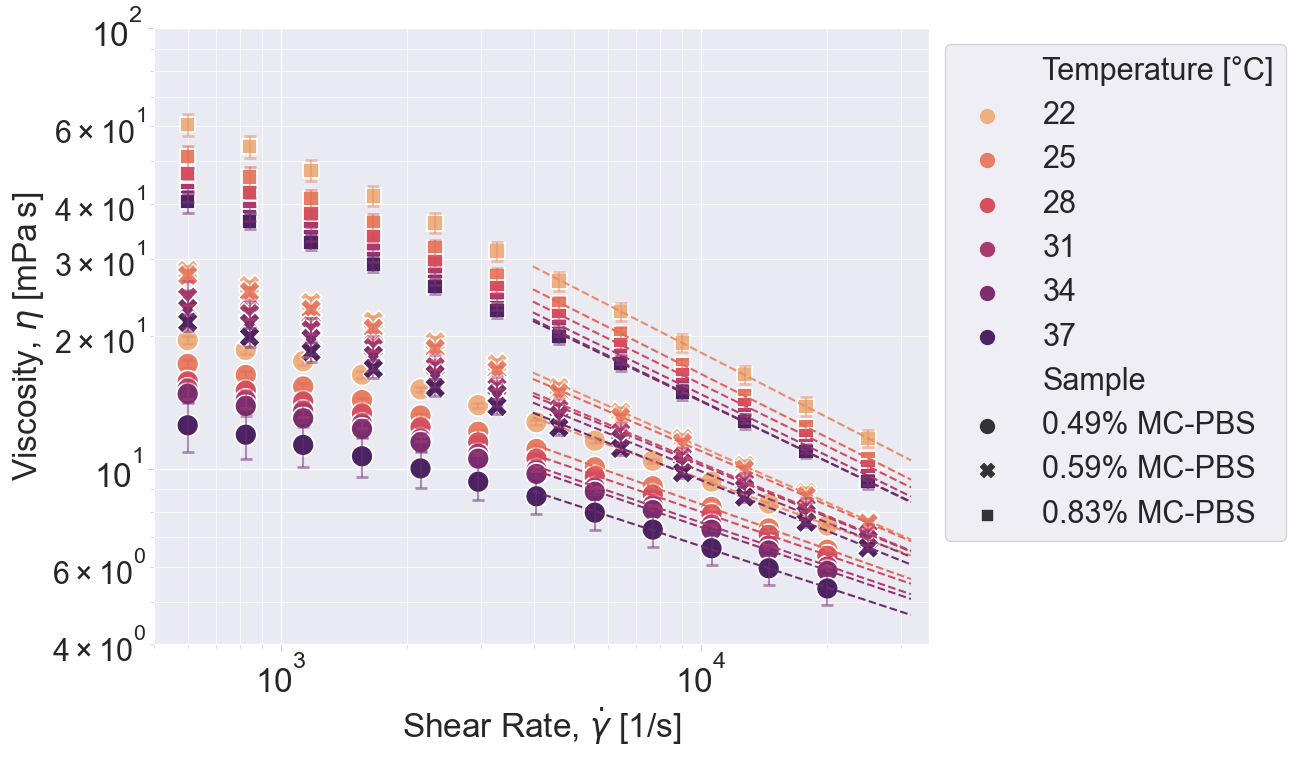

In [6]:
fontsize = 24
x_axis = 'Shear rate'
y_axis = 'Viscosity'
colors = sns.color_palette("flare",6)
temperatures = df_05_mean['Temperature [°C]'].unique()

df_fit_params = pd.DataFrame()

with sns.axes_style('darkgrid'):
    fig= plt.figure(0, (10,8))
    ax = plt.gca()

    vis = sns.scatterplot(x=x_axis, y=y_axis, data=df_means,
                          hue='Temperature [°C]',
                          style ='Sample',  zorder=2,
                          palette='flare',
                          s=250
                          )
    vis.set(xscale='log', yscale='log')

    # Fitting temperature curves
    for jj, tt in enumerate(temperatures):
        df_t_05 = df_05_mean[df_05_mean['Temperature [°C]'] == tt]
        df_t_06 = df_06_mean[df_06_mean['Temperature [°C]'] == tt]
        df_t_084 = df_084_mean[df_084_mean['Temperature [°C]'] == tt]

        df_05_std = std_05[std_05['Temperature [°C]'] == tt]
        df_06_std = std_06[std_06['Temperature [°C]'] == tt]
        df_084_std = std_084[std_084['Temperature [°C]'] == tt]

        df_t_05_all = df_05_mean_all[df_05_mean_all['Temperature [°C]'] == tt]
        df_t_06_all = df_06_mean_all[df_06_mean_all['Temperature [°C]'] == tt]
        df_t_084_all = df_084_mean_all[df_084_mean_all['Temperature [°C]'] == tt]

        xdata_05 = np.array(df_t_05['Shear rate'], dtype=float)
        ydata_05 = np.array(df_t_05['Viscosity'], dtype=float)

        xdata_06 = np.array(df_t_06['Shear rate'], dtype=float)
        ydata_06 = np.array(df_t_06['Viscosity'], dtype=float)

        xdata_084 = np.array(df_t_084['Shear rate'], dtype=float)
        ydata_084 = np.array(df_t_084['Viscosity'], dtype=float)

        xdata_05_all = np.array(df_t_05_all['Shear rate'], dtype=float)
        ydata_05_all = np.array(df_t_05_all['Viscosity'], dtype=float)

        xdata_06_all = np.array(df_t_06_all['Shear rate'], dtype=float)
        ydata_06_all = np.array(df_t_06_all['Viscosity'], dtype=float)

        xdata_084_all = np.array(df_t_084_all['Shear rate'], dtype=float)
        ydata_084_all = np.array(df_t_084_all['Viscosity'], dtype=float)

        vis_std_05 = np.array(df_05_std['Viscosity'], dtype=float)
        vis_std_06 = np.array(df_06_std['Viscosity'], dtype=float)
        vis_std_084 = np.array(df_084_std['Viscosity'], dtype=float)

        log_xdata_05 = np.log(xdata_05)
        log_ydata_05 = np.log(ydata_05)

        log_xdata_06 = np.log(xdata_06)
        log_ydata_06 = np.log(ydata_06)

        log_xdata_084 = np.log(xdata_084)
        log_ydata_084 = np.log(ydata_084)

        fit, cov = np.polyfit(log_xdata_05, log_ydata_05, 1, cov=True)
        fit_06, cov_06 = np.polyfit(log_xdata_06, log_ydata_06, 1, cov=True)
        fit_084, cov_084 = np.polyfit(log_xdata_084, log_ydata_084, 1, cov=True)

        #power law liquid values
        xdata_fit = np.logspace(3.6, 4.5)
        n = fit[0]
        K = np.exp(fit[1])
        n_05_err = np.sqrt(np.diag(cov)[0])
        K_05_err = np.sqrt(np.diag(cov)[1])
        ydata_fit_05 = K * xdata_fit**n

        n_06 = fit_06[0]
        K_06 = np.exp(fit_06[1])
        n_06_err = np.sqrt(np.diag(cov_06)[0])
        K_06_err = np.sqrt(np.diag(cov_06)[1])
        ydata_fit_06 = K_06 * xdata_fit**n_06

        n_084 = fit_084[0]
        K_084 = np.exp(fit_084[1])
        n_084_err = np.sqrt(np.diag(cov_084)[0])
        K_084_err = np.sqrt(np.diag(cov_084)[1])
        ydata_fit_084 = K_084 * xdata_fit**n_084

        ax.plot(xdata_fit, ydata_fit_05, ls='--', c=colors[jj], zorder=2)
        ax.plot(xdata_fit, ydata_fit_06, ls='--', c=colors[jj], zorder=2)
        ax.plot(xdata_fit, ydata_fit_084, ls='--', c=colors[jj], zorder=2)

        ax.errorbar(xdata_05_all, ydata_05_all, yerr=vis_std_05,
                    xerr=None, ls='None', capsize=4, capthick=2, c=colors[jj],  zorder=3, alpha=0.5)
        ax.errorbar(xdata_06_all, ydata_06_all, yerr=vis_std_06,
                    xerr=None, ls='None', capsize=4, capthick=2, c=colors[jj],  zorder=3, alpha=0.5)
        ax.errorbar(xdata_084_all, ydata_084_all, yerr=vis_std_084,
                    xerr=None, ls='None', capsize=4, capthick=2, c=colors[jj], zorder=3, alpha=0.5)

        fit_params = {'n_05': [n + 1],
                      'K_05': [K/1000], # converting mPa.s to Pa.s
                      'n_06': [n_06 + 1],
                      'K_06': [K_06/1000],
                      'n_084': [n_084 + 1],
                      'K_084': [K_084/1000],
                      'n_05_err': [n_05_err],
                      'K_05_err' : [K_05_err * K/1000],
                      'n_06_err' : [n_06_err],
                      'K_06_err' : [K_06_err * K_06/1000],
                      'n_084_err' : [n_084_err],
                      'K_084_err' : [K_084_err * K_084/1000],
                      'temperature': [tt]
                      }
        df_fit_params = pd.concat([df_fit_params, pd.DataFrame(fit_params)])

    ax.tick_params(reset=True, axis='both', which='major', labelsize=fontsize, length=5,
                   top=False, right=False, color='lightgray')
    ax.tick_params(reset=True, axis='both', which='minor', labelsize=fontsize-2, length=3,
                   top=False, right=False, color='lightgray')

    y_minor_formatter = LogFormatterSciNotation(base=10, labelOnlyBase=False, minor_thresholds=(2,0))
    ax.yaxis.set_minor_formatter(y_minor_formatter)
    ax.set_xlim(500, 35000)
    ax.set_ylim(4,100)
    ax.grid(visible=True, which='minor', axis='both', linewidth=0.5)
    ax.grid(visible=True, which='major', axis='both', linewidth=1)
    plt.xlabel("Shear Rate, $\dot\gamma$ [1/s]", fontsize=fontsize)
    plt.ylabel("Viscosity, $\eta$ [mPa$\,$s]", fontsize=fontsize)

    lgnd = plt.legend(bbox_to_anchor=[1,1], fontsize= fontsize-2)
    for handle in lgnd.legendHandles:
        handle.set_sizes([100.0])

    #savename = r"..\figures\figure_S1\Figure_S1A"
    #fig.savefig(savename+".png", dpi=900, bbox_inches="tight")
    #fig.savefig(savename+".pdf", dpi=900, bbox_inches="tight")

    plt.show()

## Fig. S1B - Temperature dependence of viscosity power law parameters

### Linear fitting of parameter n
##### $n = a\cdot T + b$

In [7]:
path = r'..\data\20220113_fitting_parameters.xlsx'

df_all = pd.read_excel(path, header=0)
df_n = pd.read_excel(path, sheet_name='n', header=0)
df_K = pd.read_excel(path, sheet_name='K', header=0)
temp_kelvin = 273 + df_all['Temperature']
df_all['temp_kelvin'] = temp_kelvin
df_n = pd.read_excel(path, sheet_name='n', header=0)
df_n['temp_kelvin'] = temp_kelvin
df_K = pd.read_excel(path, sheet_name='K', header=0)
df_K['temp_kelvin'] = temp_kelvin
df_K

Buffer      K  Temperature  K_error  temp_kelvin
0   0.49% MC-PBS  0.236           22    0.010          295
1   0.49% MC-PBS  0.191           25    0.009          298
2   0.49% MC-PBS  0.162           28    0.008          301
3   0.49% MC-PBS  0.152           31    0.009          304
4   0.49% MC-PBS  0.149           34    0.007          307
5   0.49% MC-PBS  0.119           37    0.007          310
6   0.59% MC-PBS  0.541           22    0.027          295
7   0.59% MC-PBS  0.476           25    0.010          298
8   0.59% MC-PBS  0.405           28    0.016          301
9   0.59% MC-PBS  0.379           31    0.009          304
10  0.59% MC-PBS  0.356           34    0.011          307
11  0.59% MC-PBS  0.321           37    0.008          310
12  0.83% MC-PBS  1.662           22    0.028          295
13  0.83% MC-PBS  1.367           25    0.019          298
14  0.83% MC-PBS  1.167           28    0.021          301
15  0.83% MC-PBS  1.065           31    0.024          304
16  0.83% MC-PBS  1.006           34    0.032          307
17  0.83% MC-PBS  0.945           37    0.026          310

In [27]:
fontsize = 24
df_fit = pd.DataFrame()
mc_concentrations = df_n['Buffer'].unique()
pal = sns.color_palette('tab10')

with sns.axes_style('darkgrid'):
    fig_n=plt.figure(0, (10,8))
    ax1 = plt.subplot(111)
    ax2 = ax1.twiny()

    for ii, conc in enumerate(mc_concentrations):
        data_conc = df_n[df_n['Buffer'] == conc]
        data_T = data_conc['temp_kelvin']
        data_n = data_conc['n']
        n_error = data_conc['n_error']
    
        fit_n, cov_n = np.polyfit(data_T, data_n, 1, cov=True)

        a = fit_n[0]
        b = fit_n[1]
        a_err = np.sqrt(np.diag(cov_n)[0])
        b_err = np.sqrt(np.diag(cov_n)[1])
   
        ax1.plot(data_T, data_n, 'o', c=pal[ii],
                 markersize=16, markeredgecolor='w',
                 label=conc)
        ax1.plot(data_T, a*data_T+b, '--', c=pal[ii]
            )
        ax1.errorbar(data_T, data_n, yerr=n_error,
                     xerr=None, ls='None', capsize=4, capthick=2)
        data_dict = {'a': [a],
                     'b': [b],
                     'a_err': [a_err],
                     'b_err': [b_err],
                     'buffer': [conc]
                    }
        df_fit = pd.concat([df_fit, pd.DataFrame(data_dict)])

    xlabel = r"$T$ [$\degree$C]"
    ax1.set_xlabel(xlabel, fontsize=fontsize)
    ax1.set_ylabel(r"$n$", fontsize=fontsize)

    ax1.tick_params(reset=True, axis='both', which='major', labelsize=fontsize, length=5,
                    top=False, right=False, color='lightgray')

    ax1.set_xticks([295, 298, 301, 304, 307, 310])
    ax1.set_xticklabels(['22', '25', '28', '31', '34', '37'])


    ax2.set_xticklabels(['295', '298', '301', '304', '307', '310'])


    ax2.tick_params(axis='x', labelsize=fontsize, length=5, color='lightgray')
    xlabel_top = r"$T$ [K]"
    ax2.set_xlabel(xlabel_top, fontsize=fontsize)
    ax2.grid(False)

    #savename = r"..\plots\figure_S1\Figure_S1B_column1"
    #fig_n.savefig(savename+".png", dpi=900, bbox_inches='tight')
    #fig_n.savefig(savename+".pdf", dpi=900, bbox_inches='tight')

    plt.show()

C:\Users\freiche\AppData\Local\Temp\ipykernel_49176\1064471904.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['295', '298', '301', '304', '307', '310'])


#### a and b fitting parameters together with the standard deviation from the covariance matrix

In [9]:
df_fit

a         b     a_err     b_err        buffer
0  0.002171  0.013143  0.000364  0.110059  0.49% MC-PBS
0  0.002448 -0.139238  0.000268  0.081106  0.59% MC-PBS
0  0.002133 -0.115333  0.000256  0.077369  0.83% MC-PBS

### Exponential fitting of parameter K
##### $K = D\cdot \exp\left(\frac{\lambda}{T}\right)$

C:\Users\freiche\AppData\Local\Temp\ipykernel_49176\1727822476.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(['1/310', '1/307', '1/304', '1/301', '1/298', '1/295'])


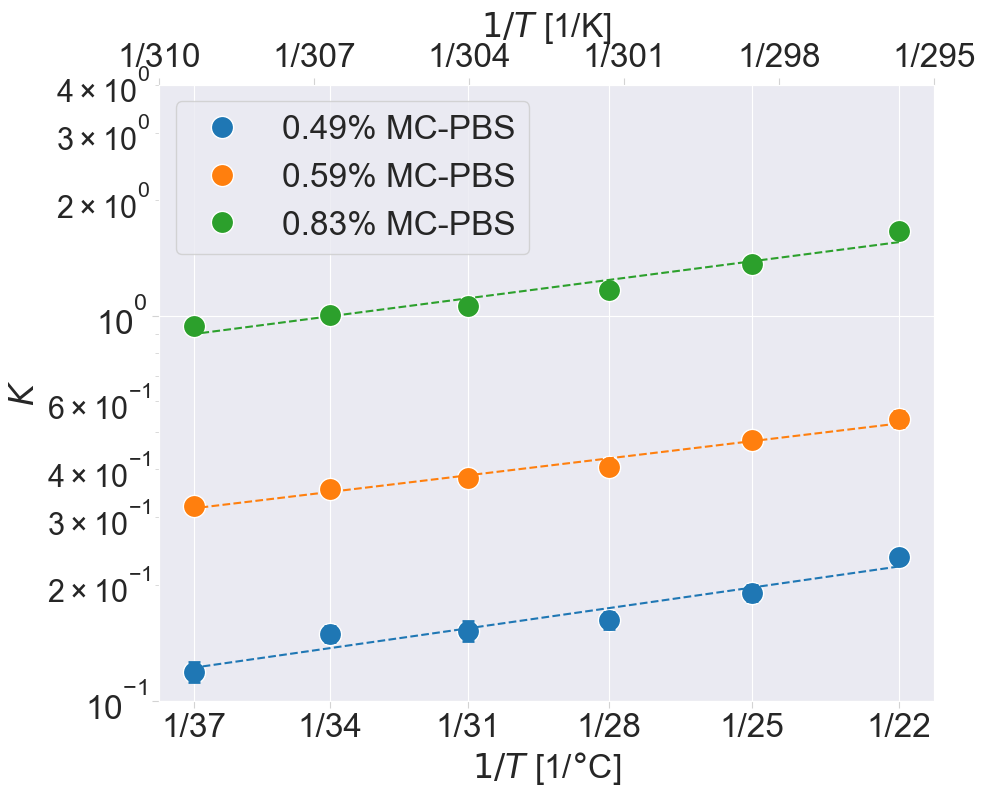

In [19]:
fontsize = 24
df_fit_K = pd.DataFrame()
mc_concentrations = df_K['Buffer'].unique()
pal = sns.color_palette('tab10')

with sns.axes_style('darkgrid'):
    fig_K=plt.figure(0, (10,8))
    ax3 = plt.subplot(111)
    ax4 = ax3.twiny()
    for ii, conc in enumerate(mc_concentrations):
        data_conc = df_K[df_K['Buffer'] == conc]
        data_T = data_conc['temp_kelvin']
        data_K = data_conc['K']
        log_K = np.log(data_K)
        reverse_T = np.divide(1.,data_T)
        K_error = data_conc['K_error']
        
        fit_K, cov_K = np.polyfit(reverse_T, log_K, 1, cov=True)

        lamda = fit_K[0]
        D = np.exp(fit_K[1])
        lamda_err = np.sqrt(np.diag(cov_K)[0])
        D_err = D * np.sqrt(np.diag(cov_K)[1])
   
        ax3.plot(reverse_T, data_K, 'o', c=pal[ii],
                 markersize=16, markeredgecolor='w',
                 label=conc)
        ax3.plot(reverse_T, D*np.exp(lamda*reverse_T),
                 '--', c=pal[ii])
        ax3.errorbar(reverse_T, data_K, yerr=K_error,
                     xerr=None, ls='None', capsize=4, capthick=2)
        data_dict = {'lambda': [lamda],
                     'D': [D],
                     'lamda_err': [lamda_err],
                     'D_err': [D_err],
                     'buffer': [conc]
                    }
        df_fit_K = pd.concat([df_fit_K, pd.DataFrame(data_dict)])

    xlabel = r"$1/T$ [1/$\degree$C]"
    ax3.set_xlabel(xlabel, fontsize=fontsize)
    ax3.set_ylabel(r"$K$", fontsize=fontsize)
    ax3.set(yscale="log")
    ax4.set(yscale='log')
    ax4.set(xscale='linear')
    ax3.tick_params(reset=True, axis='both', which='major', labelsize=fontsize, length=5,
                   top=False, right=False, color='lightgray')
    ax3.tick_params(reset=True, axis='both', which='minor', labelsize=fontsize-2, length=3,
               top=False, right=False, color='lightgray')

    y_minor_formatter = LogFormatterSciNotation(base=10, labelOnlyBase=False, minor_thresholds=(3,0))
    ax3.yaxis.set_minor_formatter(y_minor_formatter)

    ax3.set_ylim(0.1,4)
    ax3.set_xticks([1/310, 1/307, 1/304, 1/301, 1/298, 1/295])
    ax3.set_xticklabels(['1/37', '1/34', '1/31', '1/28', '1/25', '1/22'])
    ax3.legend(loc='upper left', fontsize=fontsize)

    ax4.set_xticklabels(['1/310', '1/307', '1/304', '1/301', '1/298', '1/295'])

    ax4.tick_params(axis='x', labelsize=fontsize, length=5, color='lightgray')
    xlabel_top = r"$1/T$ [1/K]"
    ax4.set_xlabel(xlabel_top, fontsize=fontsize)
    ax4.grid(False)

    #savename = r"..\plots\figure_S1\Figure_S1B_column2"
    #fig_K.savefig(savename+".png", dpi=900, bbox_inches='tight')
    #fig_K.savefig(savename+".pdf", dpi=900, bbox_inches='tight')

    plt.show()

#### D and lambda parameters together with standard error from the covariance matrix

In [21]:
df_fit_K

lambda             D   lamda_err     D_err        buffer
0  3691.790538  8.201743e-07  475.159364  0.000001  0.49% MC-PBS
0  3095.597193  1.457359e-05  242.499707  0.000012  0.59% MC-PBS
0  3351.557424  1.812658e-05  412.434936  0.000025  0.83% MC-PBS

## Fig. S1C - Temperature dependence of N1 power law parameters

In [12]:
path2 = r'..\data\20220128_fitting_parameters_N1.xlsx'

df_all_n1 = pd.read_excel(path2, header=0)
df_n_n1 = pd.read_excel(path2, sheet_name='n', header=0)
df_K_n1 = pd.read_excel(path2, sheet_name='K', header=0)
temp_kelvin = 273 + df_all_n1['Temperature']
df_all_n1['temp_kelvin'] = temp_kelvin
df_n_n1 = pd.read_excel(path2, sheet_name='n', header=0)
df_n_n1['temp_kelvin'] = temp_kelvin
df_K_n1 = pd.read_excel(path2, sheet_name='K', header=0)
df_K_n1['temp_kelvin'] = temp_kelvin
df_n_n1

Buffer      n  Temperature  n_error  temp_kelvin
0   0.49% MC-PBS  0.903           22   0.0700          295
1   0.49% MC-PBS  0.857           25   0.0266          298
2   0.49% MC-PBS  0.978           28   0.0328          301
3   0.49% MC-PBS  0.983           31   0.0344          304
4   0.49% MC-PBS  1.051           34   0.0429          307
5   0.49% MC-PBS  1.014           37   0.0299          310
6   0.59% MC-PBS  0.718           22   0.0660          295
7   0.59% MC-PBS  0.843           25   0.0094          298
8   0.59% MC-PBS  0.797           28   0.0261          301
9   0.59% MC-PBS  0.869           31   0.0177          304
10  0.59% MC-PBS  0.812           34   0.0124          307
11  0.59% MC-PBS  0.838           37   0.0085          310
12  0.83% MC-PBS  0.722           22   0.0130          295
13  0.83% MC-PBS  0.761           25   0.0040          298
14  0.83% MC-PBS  0.770           28   0.0073          301
15  0.83% MC-PBS  0.793           31   0.0073          304
16  0.83% MC-PBS  0.761           34   0.0132          307
17  0.83% MC-PBS  0.761           37   0.0166          310

In [13]:
fontsize = 24
df_fit = pd.DataFrame()
mc_concentrations = df_n_n1['Buffer'].unique()
pal = sns.color_palette('tab10')

with sns.axes_style('darkgrid'):
    fig_n=plt.figure(0, (10,8))
    ax1 = plt.subplot(111)
    ax2 = ax1.twiny()

    for ii, conc in enumerate(mc_concentrations):
        data_conc = df_n_n1[df_n_n1['Buffer'] == conc]
        data_T = data_conc['temp_kelvin']
        data_n = data_conc['n']
        n_error = data_conc['n_error']

        fit_n, cov_n = np.polyfit(data_T, data_n, 1, cov=True) # trying linear fitting for this data

        a = fit_n[0]
        b = fit_n[1]
        a_err = np.sqrt(np.diag(cov_n)[0])
        b_err = np.sqrt(np.diag(cov_n)[1])

        ax1.plot(data_T, data_n, 'o', c=pal[ii],
                 markersize=16, markeredgecolor='w',
                 label=conc)
        #ax1.plot(data_T, a*data_T+b, '--', c=pal[ii]) #plotting the linear fitting for n_n1
        ax1.errorbar(data_T, data_n, yerr=n_error, xerr=None, ls='None', capsize=4, capthick=2)
        data_dict = {'a': [a],
                     'b': [b],
                     'a_err': [a_err],
                     'b_err': [b_err],
                     'buffer': [conc]
                     }
        df_fit = pd.concat([df_fit, pd.DataFrame(data_dict)])

    xlabel = r"$T$ [$\degree$C]"
    ax1.set_xlabel(xlabel, fontsize=fontsize)
    ax1.set_ylabel(r"$n_{N1}$", fontsize=fontsize)
    ax1.tick_params(reset=True, axis='both', which='major', labelsize=fontsize, length=5,
                    top=False, right=False, color='lightgray')
    ax1.tick_params(reset=True, axis='both', which='minor', labelsize=fontsize-2, length=3,
                    top=False, right=False, color='lightgray')

    ax1.set_xticks([295, 298, 301, 304, 307, 310])
    ax1.set_xticklabels(['22', '25', '28', '31', '34', '37'])
    ax2.set_xticklabels(['295', '298', '301', '304', '307', '310'])
    ax2.grid(False)

    ax2.tick_params( axis='x',  labelsize=fontsize, length=5, color='lightgray')
    xlabel_top = r"$T$ [K]"
    ax2.set_xlabel(xlabel_top, fontsize=fontsize)

#savename = r"..\plots\figure_S1\Figure_S1C_column1"
#fig_n.savefig(savename+".png", dpi=900, bbox_inches='tight')
#fig_n.savefig(savename+".pdf", dpi=900, bbox_inches='tight')

plt.show()

C:\Users\freiche\AppData\Local\Temp\ipykernel_49176\218716347.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['295', '298', '301', '304', '307', '310'])


In [14]:
df_fit

a         b     a_err     b_err        buffer
0  0.010876 -2.325714  0.003372  1.020253  0.49% MC-PBS
0  0.005514 -0.855238  0.003812  1.153228  0.59% MC-PBS
0  0.002076  0.133286  0.001758  0.531784  0.83% MC-PBS

In [15]:
fontsize = 24
df_fit_K = pd.DataFrame()
mc_concentrations = df_K_n1['Buffer'].unique()
pal = sns.color_palette('tab10')

with sns.axes_style('darkgrid'):
    fig_K=plt.figure(0, (10,8))
    ax2 = plt.subplot(111)
    ax3 = ax2.twiny()


    for ii, conc in enumerate(mc_concentrations):
        data_conc = df_K_n1[df_K_n1['Buffer'] == conc]
        data_T = data_conc['temp_kelvin']
        data_K = data_conc['K']
        log_K = np.log(data_K)
        reverse_T = np.divide(1.,data_T)
        K_error = data_conc['K_error']

        fit_K, cov_K = np.polyfit(reverse_T, log_K, 1, cov=True)

        lamda = fit_K[0]
        D = np.exp(fit_K[1])
        lamda_err = np.sqrt(np.diag(cov_K)[0])
        D_err = np.sqrt(np.diag(cov_K)[1])

        ax2.plot(reverse_T, data_K, 'o', c=pal[ii],
                 markersize=16, markeredgecolor='w',
                 label=conc)
        ax2.plot(reverse_T, D*np.exp(lamda*reverse_T), '--', c=pal[ii]) #exponentional fitting of K_N1
        plotline1, caplines1, barlinecols1 = ax2.errorbar(reverse_T, data_K, yerr=K_error, lolims=True, xerr=None,
                                                          ls='None', capsize=4, capthick=2, fmt='')
        caplines1[0].set_marker('_')

        data_dict = {'lambda': [lamda],
                     'D': [D],
                     'lamda_err': [lamda_err],
                     'D_err': [D_err],
                     'buffer': [conc]
                     }
        df_fit_K = pd.concat([df_fit_K, pd.DataFrame(data_dict)])

    xlabel = r"$T$ [$\degree$C]"
    ax2.set_xlabel(xlabel, fontsize=fontsize)
    ax2.set_ylabel(r"$K_{N1}$", fontsize=fontsize)
    #ax2.tick_params(axis='both', which='both', labelsize=14, width=20, length=5)
    ax2.set_ylim(0.003,20)
    ax2.set(xscale='linear', yscale='log')
    ax2.set_xticks([1/310, 1/307, 1/304, 1/301, 1/298, 1/295])
    ax2.set_xticklabels(['1/37', '1/34', '1/31', '1/28', '1/25', '1/22'])

    ax3.set_xticklabels(['1/310', '1/307', '1/304', '1/301', '1/298', '1/295'])

    ax2.tick_params(reset=True, axis='both', which='major', labelsize=fontsize, length=5,
                    top=False, right=False, color='lightgray')
    ax2.tick_params(reset=True, axis='both', which='minor', labelsize=fontsize-2, length=3,
                    top=False, right=False, color='lightgray')
    ax3.tick_params(axis='x',labelsize=fontsize, length=5, color='lightgray')

    xlabel_top = r"$T$ [K]"
    ax3.set_xlabel(xlabel_top, fontsize=fontsize)

    y_minor_formatter = LogFormatterSciNotation(base=10, labelOnlyBase=False, minor_thresholds=(3,0))
    ax2.yaxis.set_minor_formatter(y_minor_formatter)
    ax2.legend(loc='upper left', fontsize=fontsize)
    ax3.grid(False)

    #savename = "r"..\plots\fig_S1\Figure_S1C_column2"
    #fig_K.savefig(savename+".png", dpi=900, bbox_inches='tight')
    #fig_K.savefig(savename+".pdf", dpi=900, bbox_inches='tight')

    plt.show()

C:\Users\freiche\AppData\Local\Temp\ipykernel_49176\977404810.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['1/310', '1/307', '1/304', '1/301', '1/298', '1/295'])


In [16]:
# Exponential fitting of K_N1 with 1/T; fitting parameters and standard deviations
df_fit_K

lambda             D    lamda_err      D_err        buffer
0  12012.192438  1.308411e-19  2857.338569   9.449814  0.49% MC-PBS
0   6255.127376  1.425452e-10  3153.558808  10.429476  0.59% MC-PBS
0   3634.355920  2.134734e-06  1783.015637   5.896804  0.83% MC-PBS

##### Redo the fit for $K$ by working with a fixed exponent $\lambda$ for all concentrations and only fit to find $D$
Within error margins the value $\lambda$ did not change dependent on buffer concentration. To estimate the viscosity at any concentration, it is valid to work with the same value of $\lambda$ for all concentrations. For this, the value of $D$ needs to be adapted so that the equation $K=D\cdot\exp\left(\lambda/T\right)$ still leads to the correct value.

In [22]:
mean_lambda = df_fit_K['lambda'].mean()

In [26]:
fontsize = 24
df_fit_K_fixed_l = pd.DataFrame()
mc_concentrations = df_K['Buffer'].unique()
pal = sns.color_palette('tab10')

with sns.axes_style('darkgrid'):
    fig_K=plt.figure(0, (10,8))
    ax3 = plt.subplot(111)
    ax4 = ax3.twiny()
    for ii, conc in enumerate(mc_concentrations):
        data_conc = df_K[df_K['Buffer'] == conc]
        data_T = data_conc['temp_kelvin']
        data_K = data_conc['K']
        log_K = np.log(data_K)
        reverse_T = np.divide(1.,data_T)
        K_error = data_conc['K_error']

        # intercept that best fits the data, given a fixed slope
        ict = np.mean(log_K - mean_lambda*reverse_T)
        ict_err = np.std(log_K - mean_lambda*reverse_T) / np.sqrt(len(reverse_T))
        D = np.exp(ict)
        D_err = D * ict_err

        ax3.plot(reverse_T, data_K, 'o', c=pal[ii],
                 markersize=16, markeredgecolor='w',
                 label=conc)
        ax3.plot(reverse_T, D*np.exp(mean_lambda*reverse_T),
                 '--', c=pal[ii])
        ax3.errorbar(reverse_T, data_K, yerr=K_error,
                     xerr=None, ls='None', capsize=4, capthick=2)
        data_dict = {'buffer': [conc],
                     'D': [D],
                     'D_err': [D_err],
                     }
        df_fit_K_fixed_l = pd.concat([df_fit_K_fixed_l, pd.DataFrame(data_dict)])

    xlabel = r"$1/T$ [1/$\degree$C]"
    ax3.set_xlabel(xlabel, fontsize=fontsize)
    ax3.set_ylabel(r"$K$", fontsize=fontsize)
    ax3.set(yscale="log")
    ax4.set(yscale='log')
    ax4.set(xscale='linear')
    ax3.tick_params(reset=True, axis='both', which='major', labelsize=fontsize, length=5,
                    top=False, right=False, color='lightgray')
    ax3.tick_params(reset=True, axis='both', which='minor', labelsize=fontsize-2, length=3,
                    top=False, right=False, color='lightgray')

    y_minor_formatter = LogFormatterSciNotation(base=10, labelOnlyBase=False, minor_thresholds=(3,0))
    ax3.yaxis.set_minor_formatter(y_minor_formatter)

    ax3.set_ylim(0.1,4)
    ax3.set_xticks([1/310, 1/307, 1/304, 1/301, 1/298, 1/295])
    ax3.set_xticklabels(['1/37', '1/34', '1/31', '1/28', '1/25', '1/22'])
    ax3.legend(loc='upper left', fontsize=fontsize)

    ax4.set_xticklabels(['1/310', '1/307', '1/304', '1/301', '1/298', '1/295'])

    ax4.tick_params(axis='x', labelsize=fontsize, length=5, color='lightgray')
    xlabel_top = r"$1/T$ [1/K]"
    ax4.set_xlabel(xlabel_top, fontsize=fontsize)
    ax4.grid(False)

    plt.show()

C:\Users\freiche\AppData\Local\Temp\ipykernel_49176\1685599459.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(['1/310', '1/307', '1/304', '1/301', '1/298', '1/295'])


In [24]:
df_fit_K_fixed_l

buffer         D         D_err
0  0.49% MC-PBS  0.000002  5.267310e-08
0  0.59% MC-PBS  0.000006  7.323568e-08
0  0.83% MC-PBS  0.000017  3.118252e-07